## Finding the paramters of the ideal SARIMA model
---
To determine the parameters for the SARIMA model, we need to conduct a series of steps:
- Test if the data is stationary.
- Identification of Parameters
- Seasonality
- Grid Search
- Model Evaluation

### Stationary Check & Identification of Parameters

involves identifying the appropriate parameters for your time series model. This step typically includes identifying the order of differencing (d), autoregressive (p), and moving average (q) parameters for models like ARIMA (AutoRegressive Integrated Moving Average) or SARIMA (Seasonal AutoRegressive Integrated Moving Average).

Processing file: ../data/out/boston_Public Works Department_train.csv
ADF Statistic: -9.252204346514146
p-value: 1.4818548154247846e-15


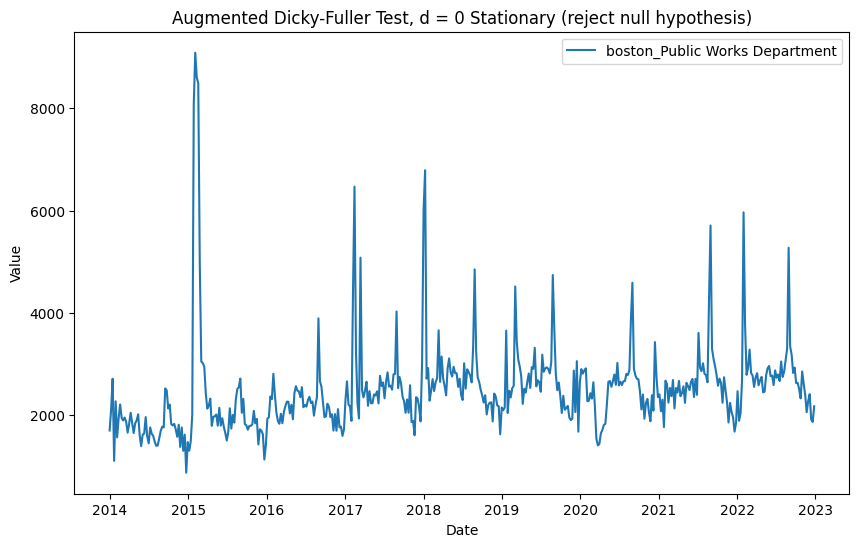

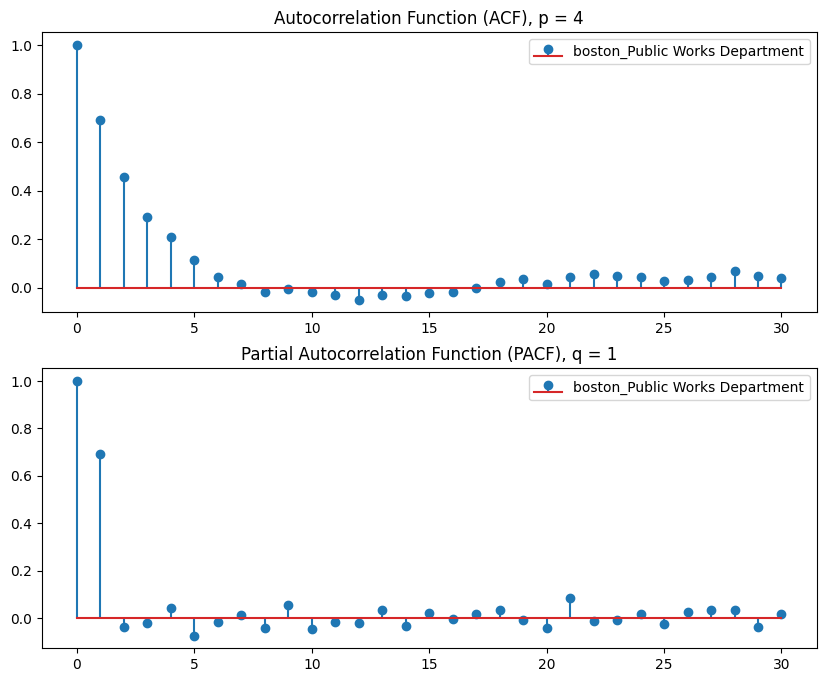

{'d': 0, 'p': 4, 'q': 1}
Processing file: ../data/out/buffalo_DPIS_train.csv
ADF Statistic: -6.535529555924147
p-value: 9.630239821106204e-09


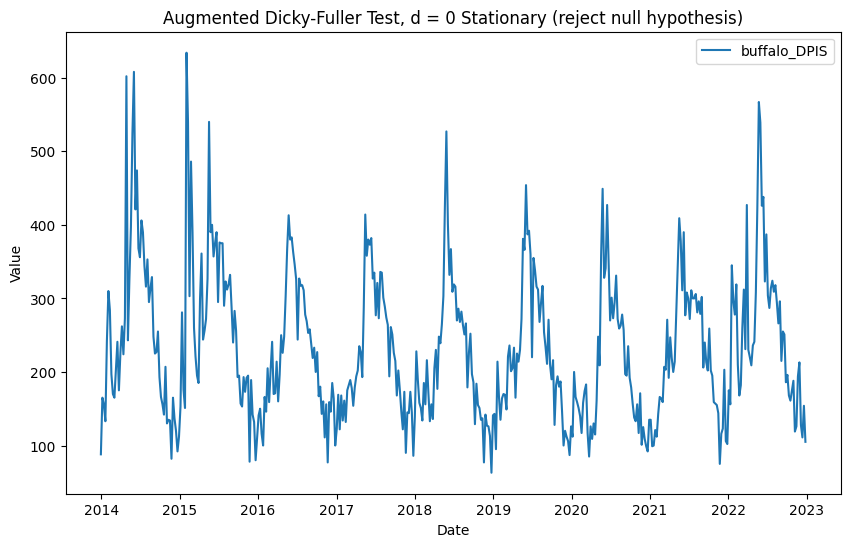

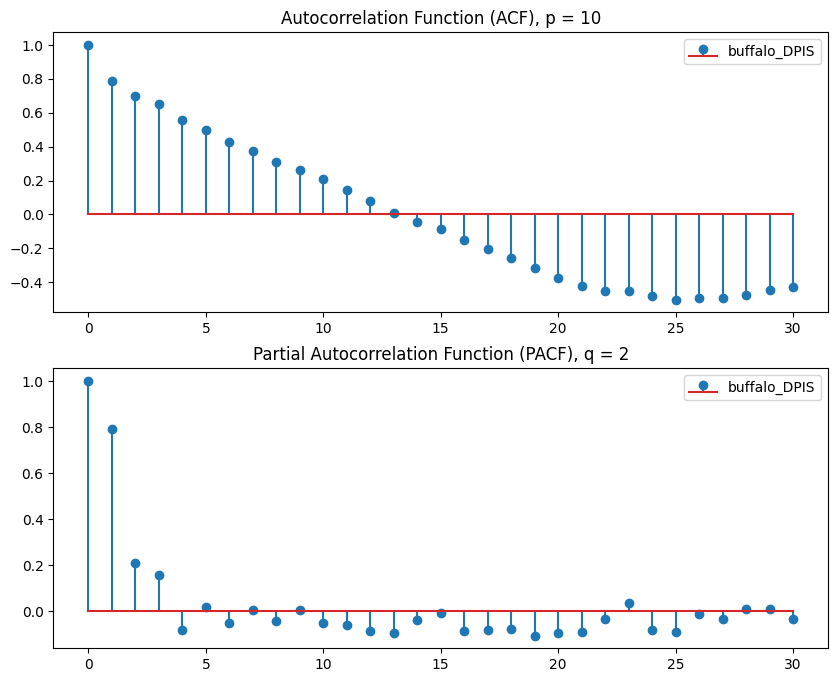

{'d': 0, 'p': 10, 'q': 2}
Processing file: ../data/out/boston_Transportation - Traffic Division_train.csv
ADF Statistic: -2.1094045631571734
p-value: 0.24074983379897036
Differencing d=1, ADF Statistic: -8.020097877974315
Differencing d=1, p-value: 2.0874963496581257e-12
Determined d=1 for differencing.


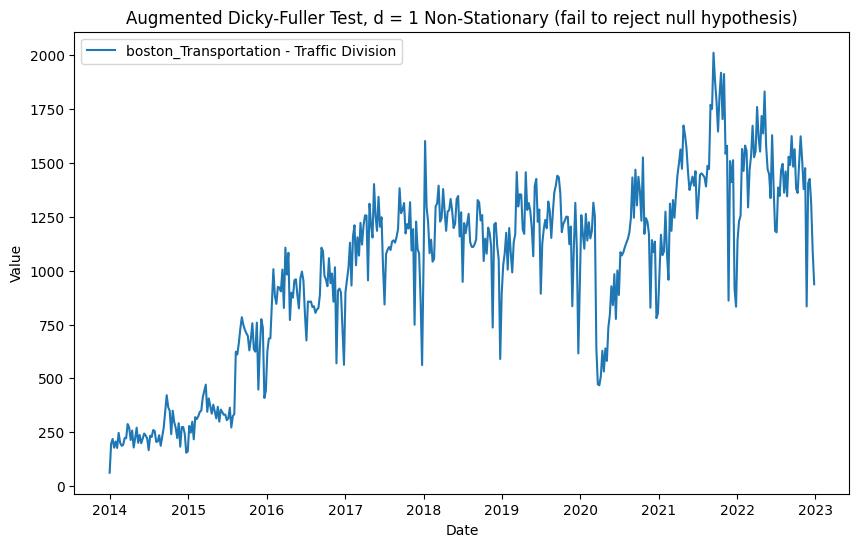

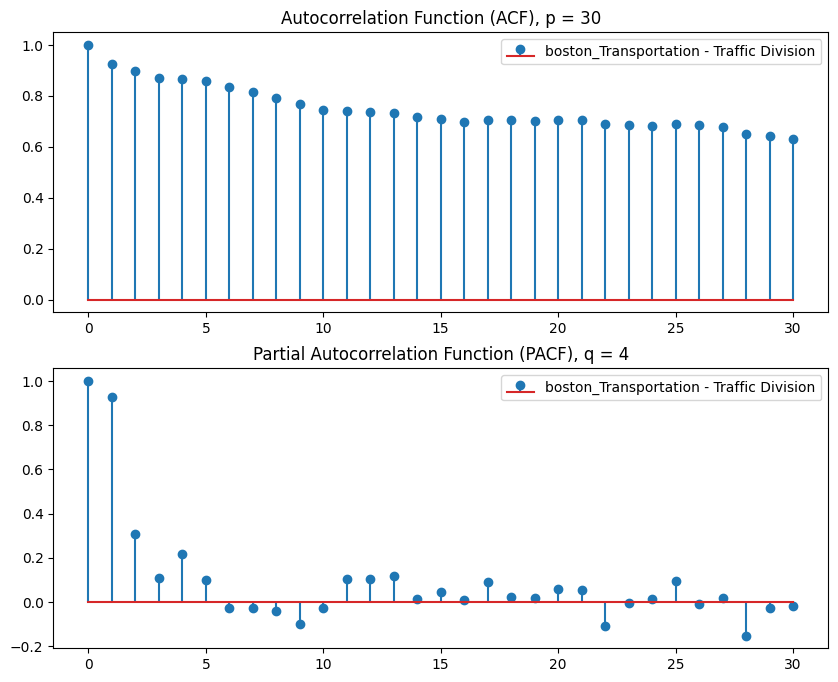

{'d': 1, 'p': 30, 'q': 4}
Processing file: ../data/out/oakland_PARKING_train.csv
ADF Statistic: -1.068264391857137
p-value: 0.7275603954505774
Differencing d=1, ADF Statistic: -8.59298830312043
Differencing d=1, p-value: 7.201807828751531e-14
Determined d=1 for differencing.


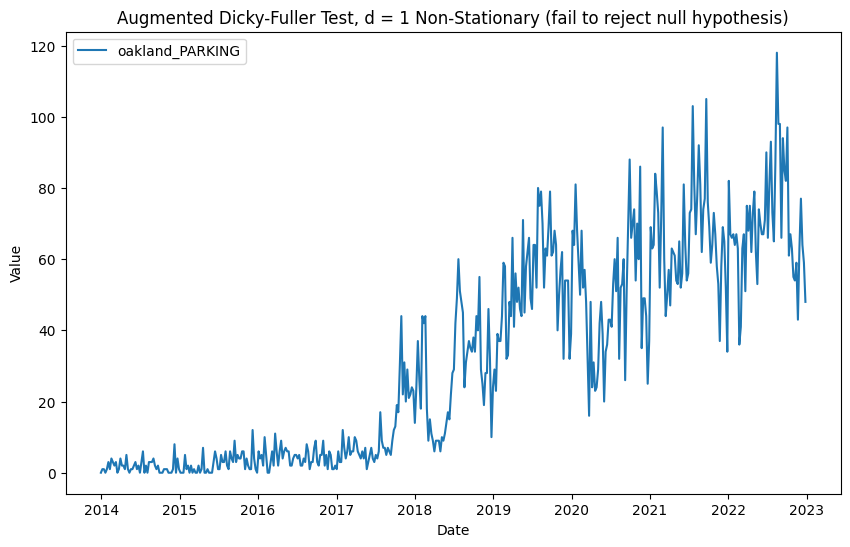

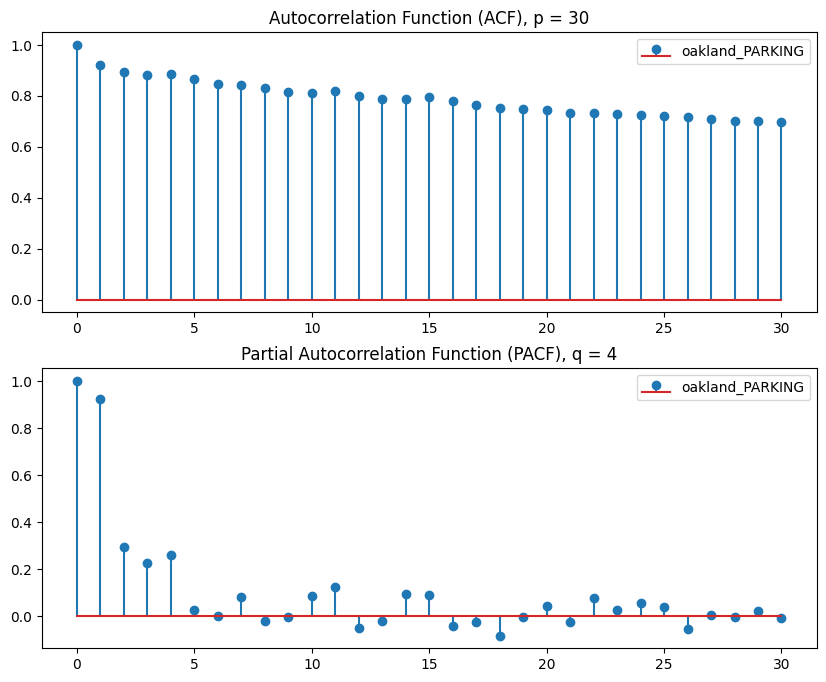

{'d': 1, 'p': 30, 'q': 4}
Processing file: ../data/out/boston_train.csv
ADF Statistic: -7.791887182701682
p-value: 7.90176472477083e-12


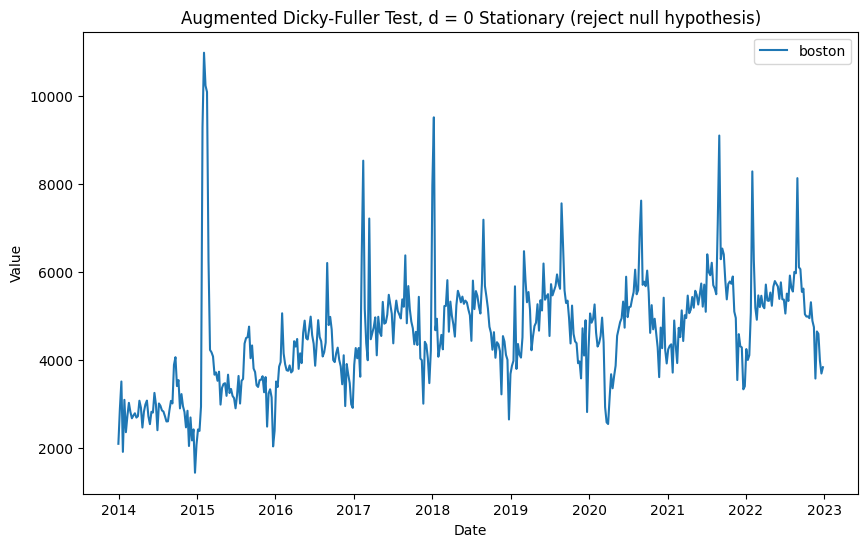

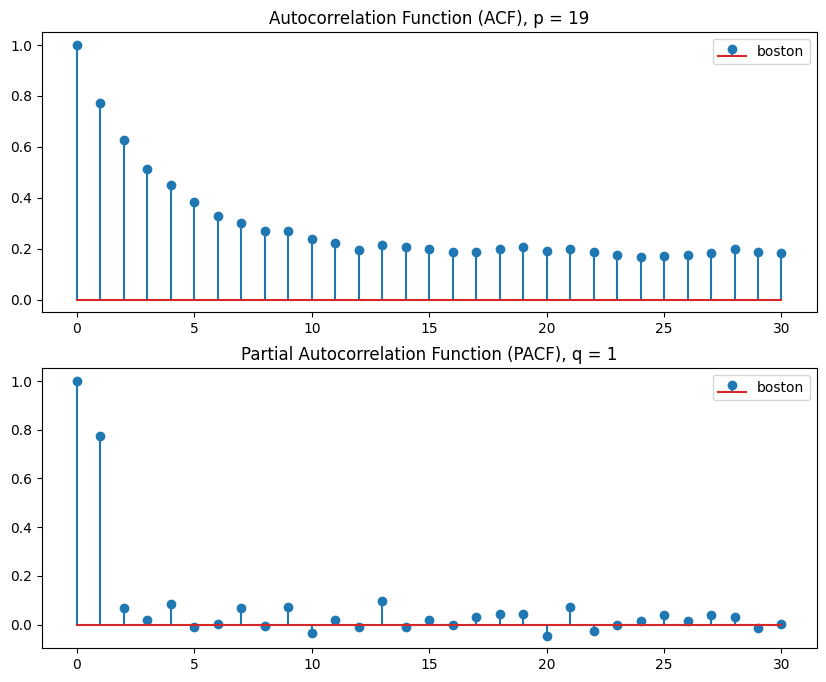

{'d': 0, 'p': 19, 'q': 1}
Processing file: ../data/out/washington_UFA_train.csv
ADF Statistic: -8.123600066657339
p-value: 1.1386878725335753e-12


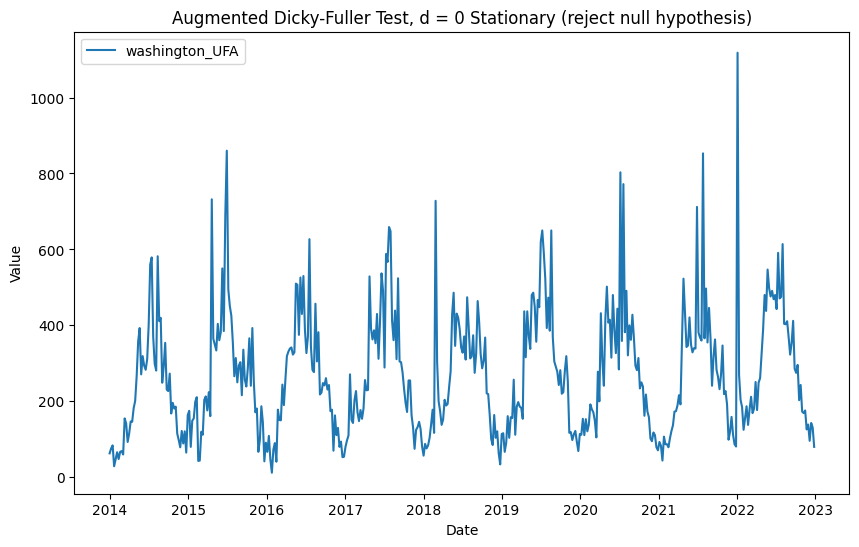

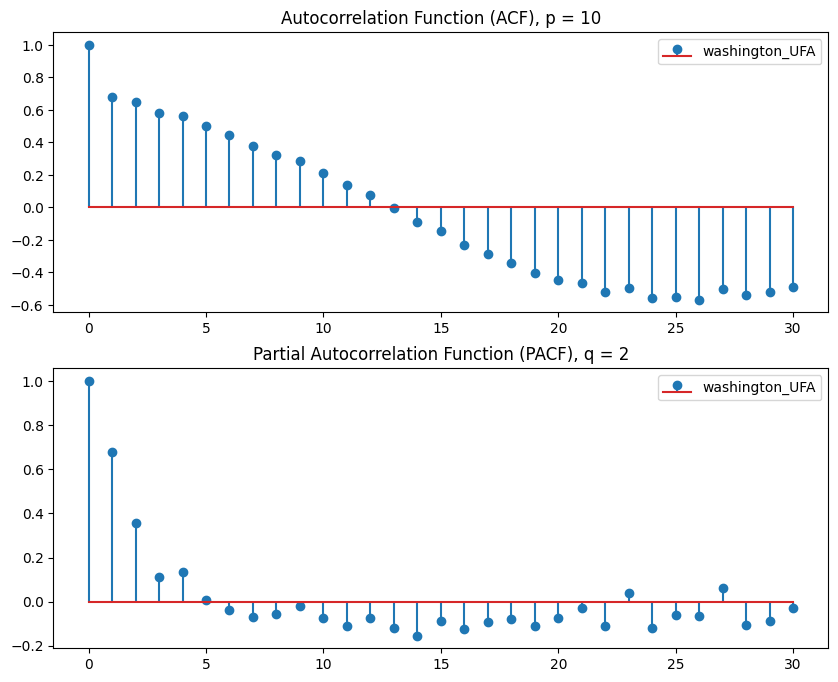

{'d': 0, 'p': 10, 'q': 2}
Processing file: ../data/out/oakland_STREETSW_train.csv
ADF Statistic: -4.924739737825185
p-value: 3.1206826395903164e-05


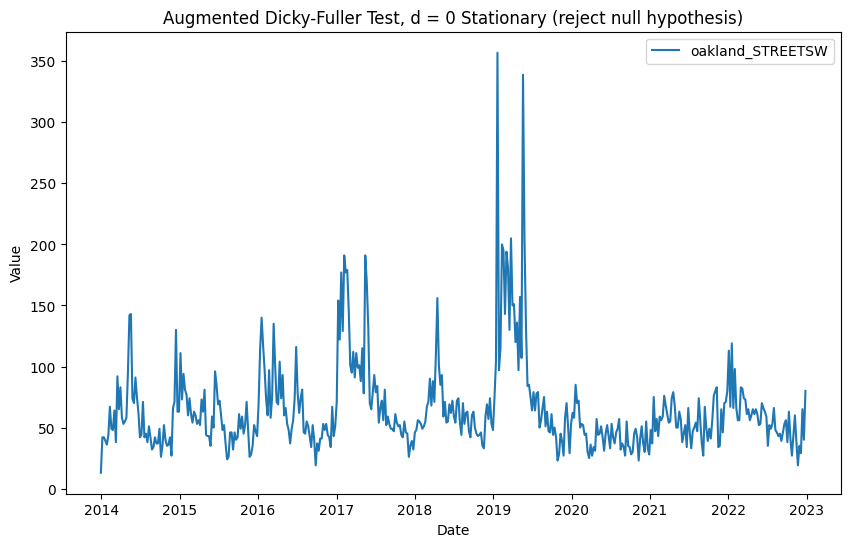

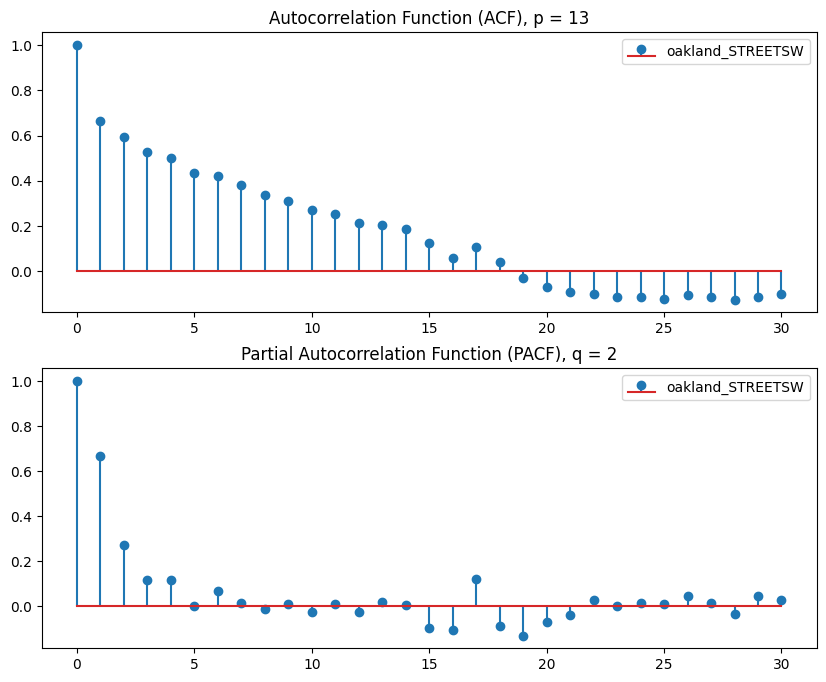

{'d': 0, 'p': 13, 'q': 2}
Processing file: ../data/out/washington_TOA-CW_train.csv
ADF Statistic: -2.2106273073421825
p-value: 0.20241099245300848
Differencing d=1, ADF Statistic: -8.24491245261022
Differencing d=1, p-value: 5.587715797883038e-13
Determined d=1 for differencing.


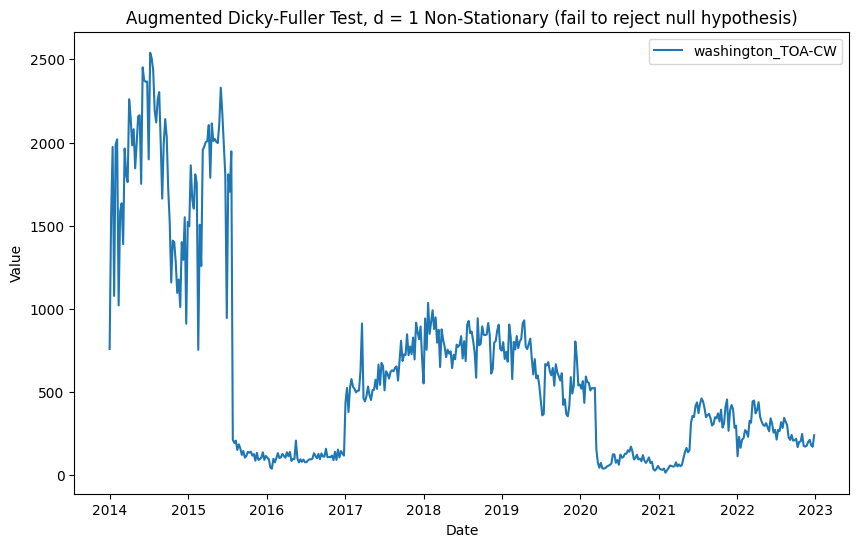

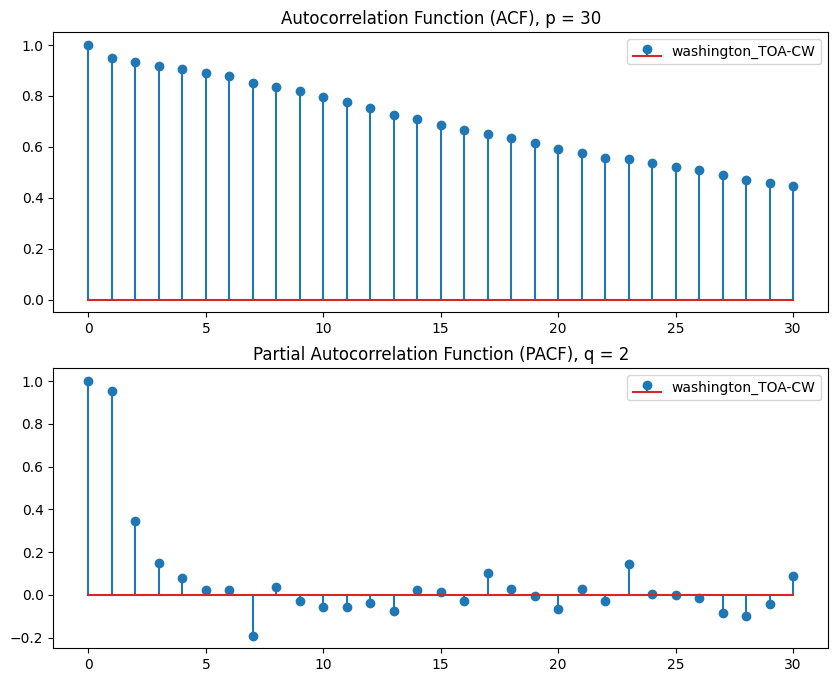

{'d': 1, 'p': 30, 'q': 2}
Processing file: ../data/out/buffalo_Buffalo Police Department_train.csv
ADF Statistic: -5.33427148592051
p-value: 4.648082243412718e-06


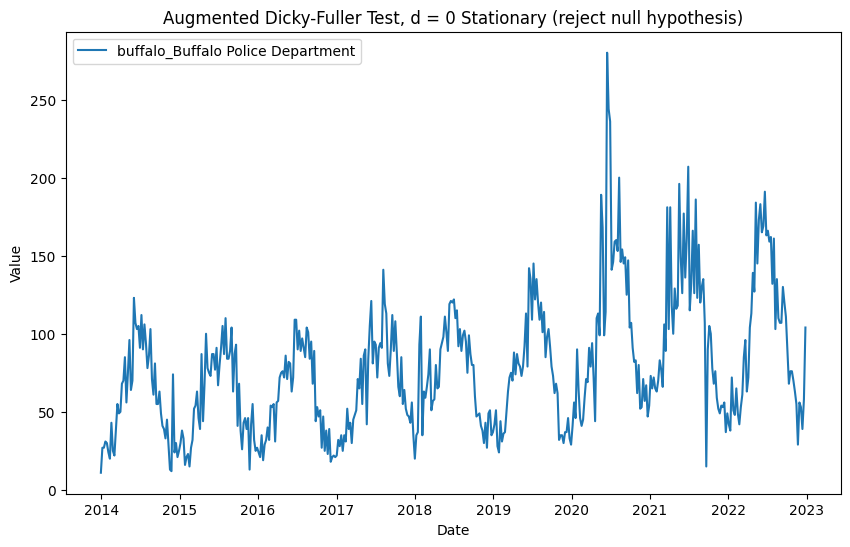

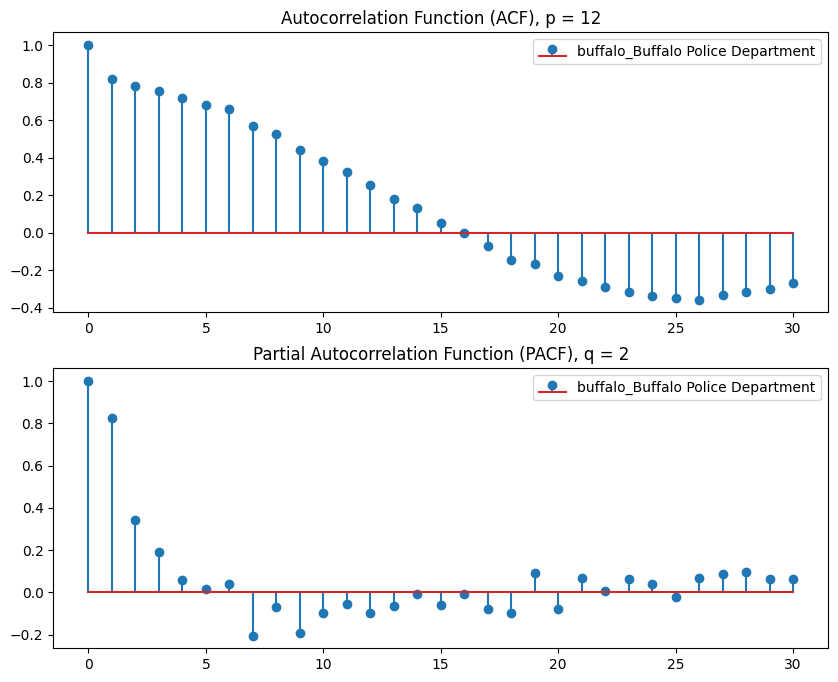

{'d': 0, 'p': 12, 'q': 2}
Processing file: ../data/out/washington_train.csv
ADF Statistic: -2.76012676630283
p-value: 0.06419896034914181
Differencing d=1, ADF Statistic: -14.353812432042446
Differencing d=1, p-value: 1.0112770338702153e-26
Determined d=1 for differencing.


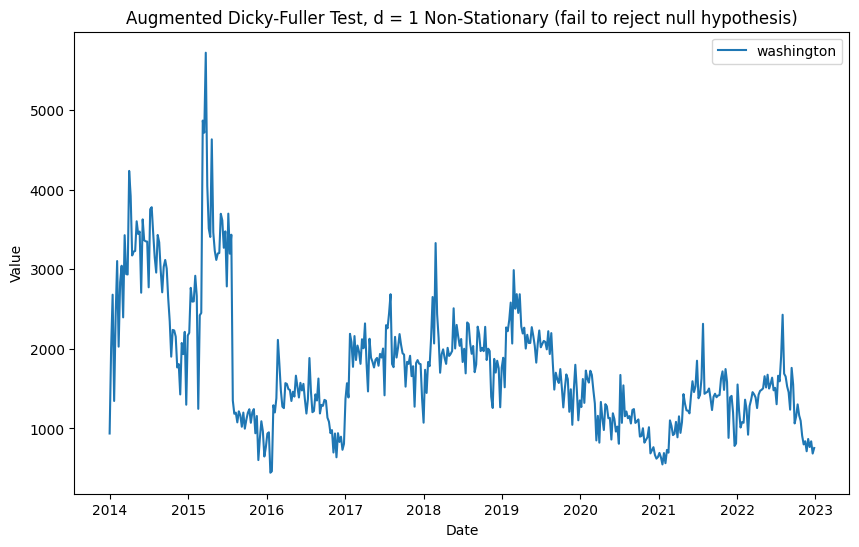

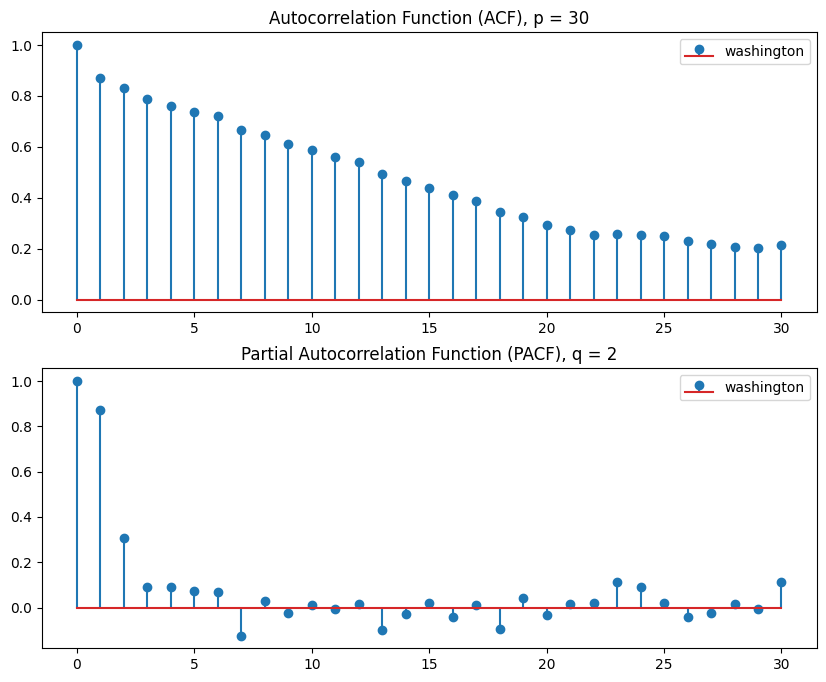

{'d': 1, 'p': 30, 'q': 2}
Processing file: ../data/out/buffalo_Dept of Public Works_train.csv
ADF Statistic: -4.6577333400306
p-value: 0.0001009611748124636


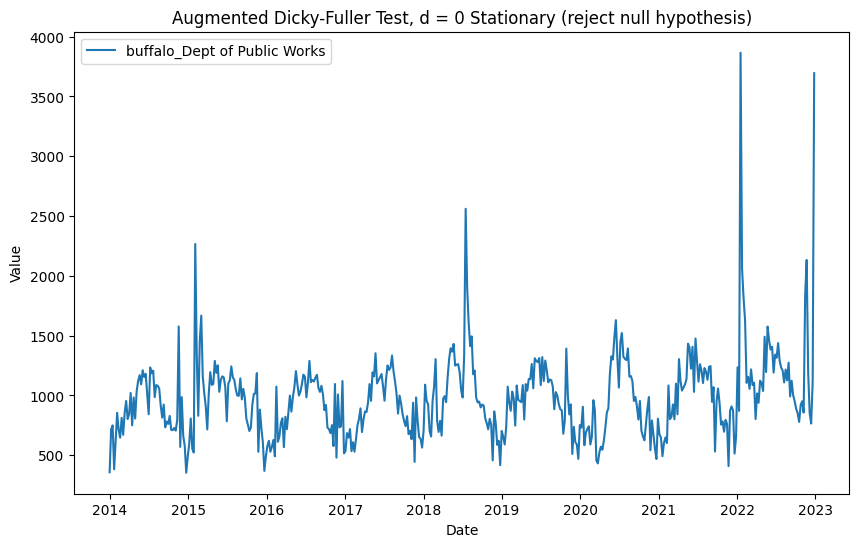

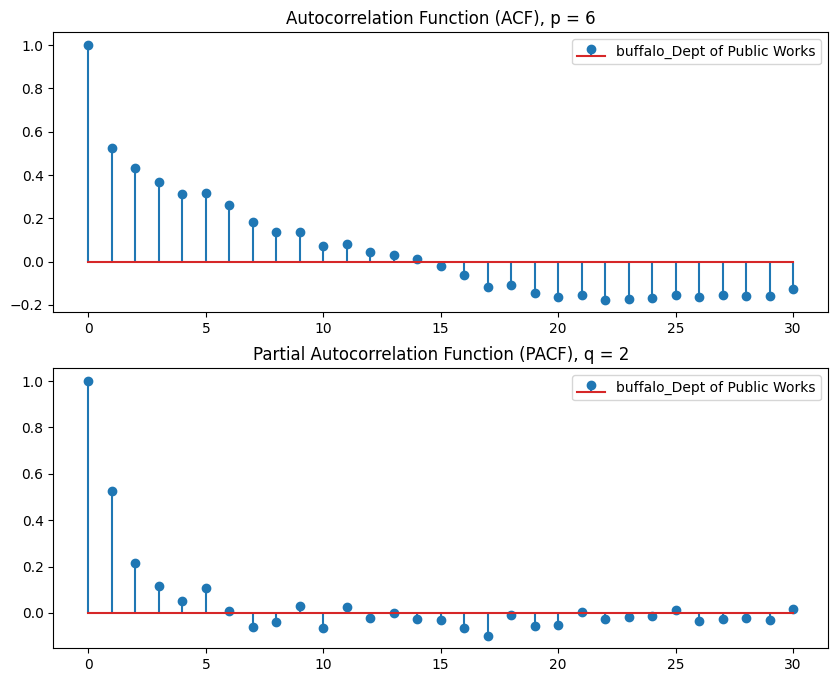

{'d': 0, 'p': 6, 'q': 2}
Processing file: ../data/out/washington_TOA-S&M_train.csv
ADF Statistic: -5.281424762162489
p-value: 5.982214503452677e-06


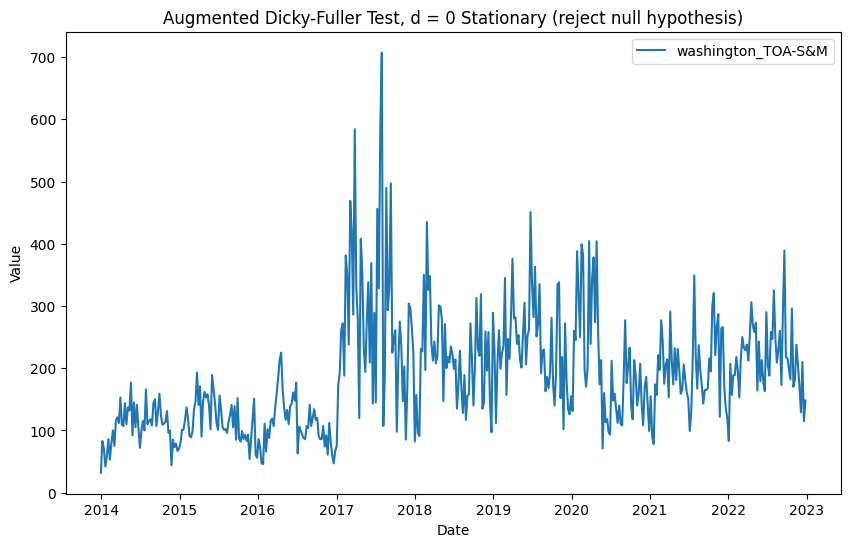

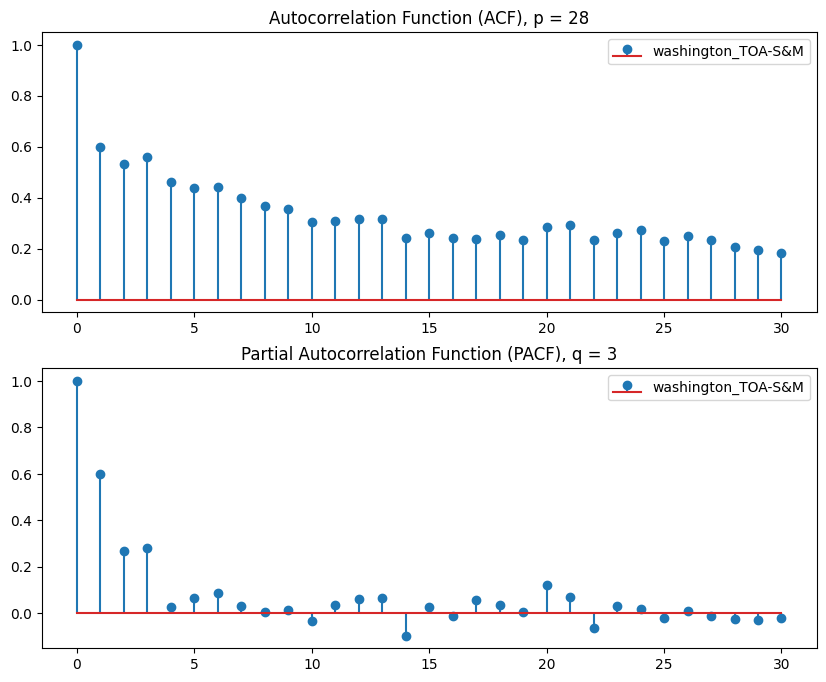

{'d': 0, 'p': 28, 'q': 3}
Processing file: ../data/out/boston_Inspectional Services_train.csv
ADF Statistic: -5.363898888471504
p-value: 4.031618707055358e-06


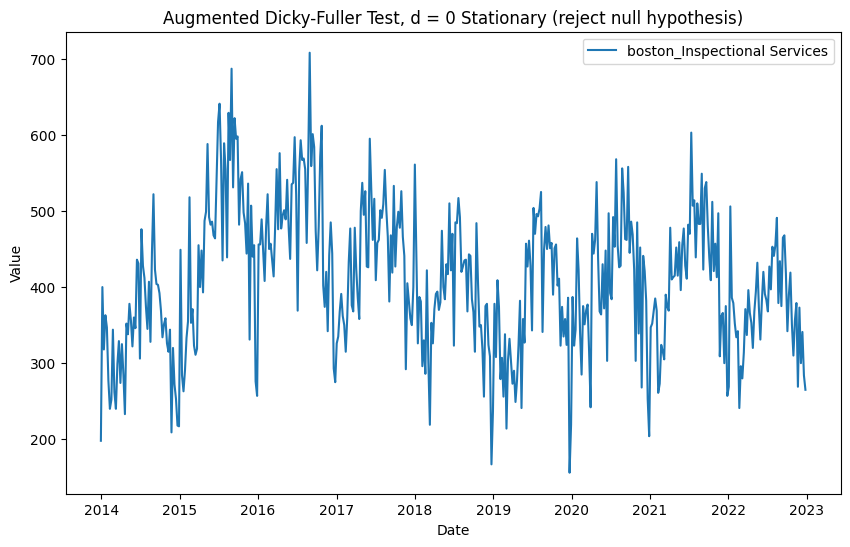

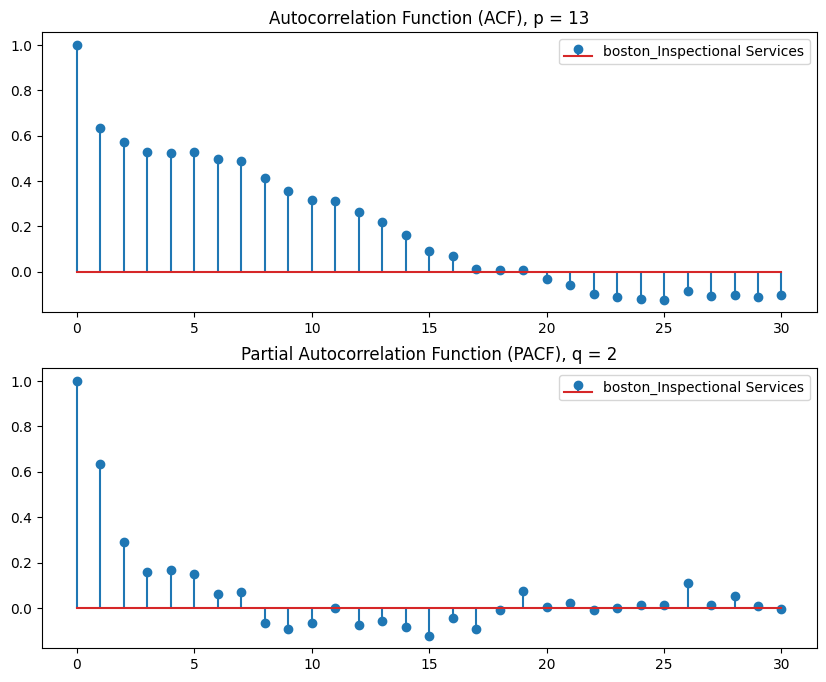

{'d': 0, 'p': 13, 'q': 2}
Processing file: ../data/out/buffalo_train.csv
ADF Statistic: -5.33451735277304
p-value: 4.642608285636375e-06


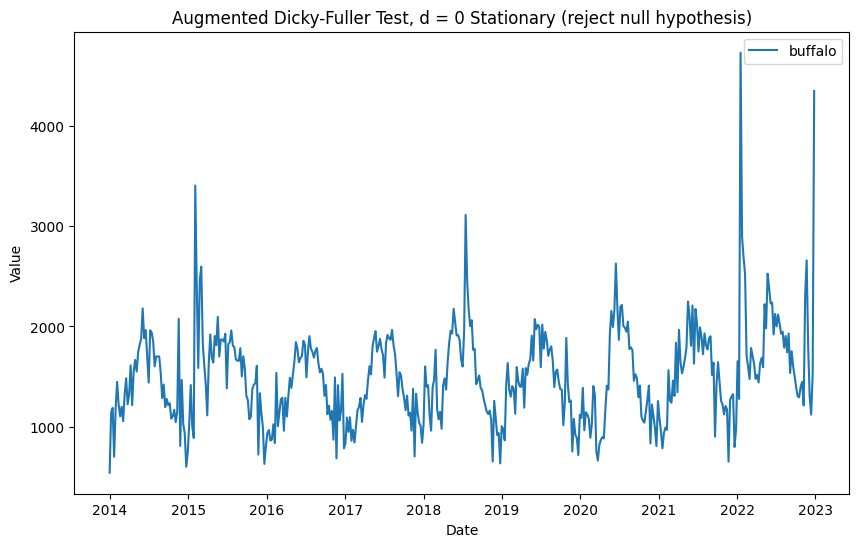

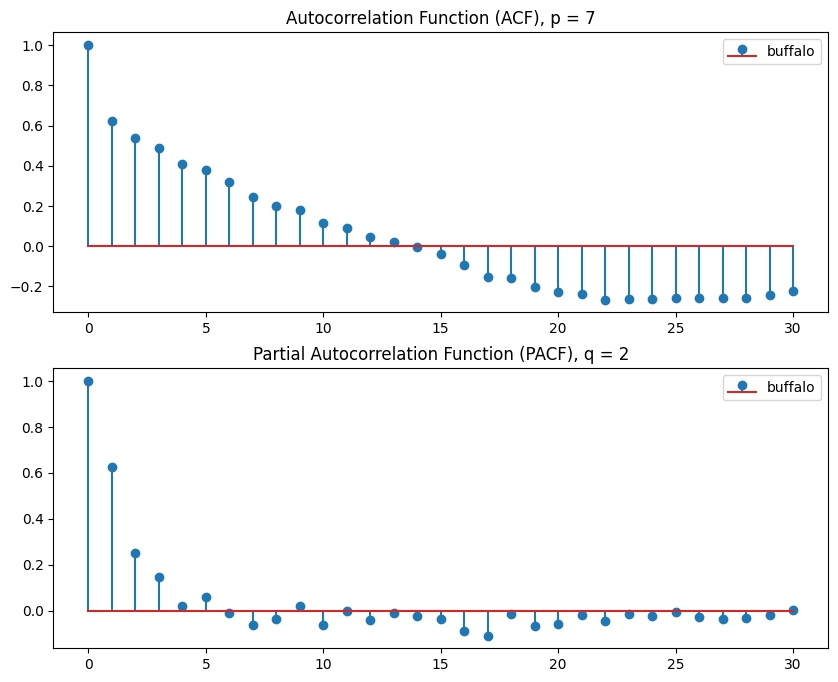

{'d': 0, 'p': 7, 'q': 2}
Processing file: ../data/out/oakland_train.csv
ADF Statistic: -2.4308835321334925
p-value: 0.13320878244629736
Differencing d=1, ADF Statistic: -9.935778643892014
Differencing d=1, p-value: 2.746226328130951e-17
Determined d=1 for differencing.


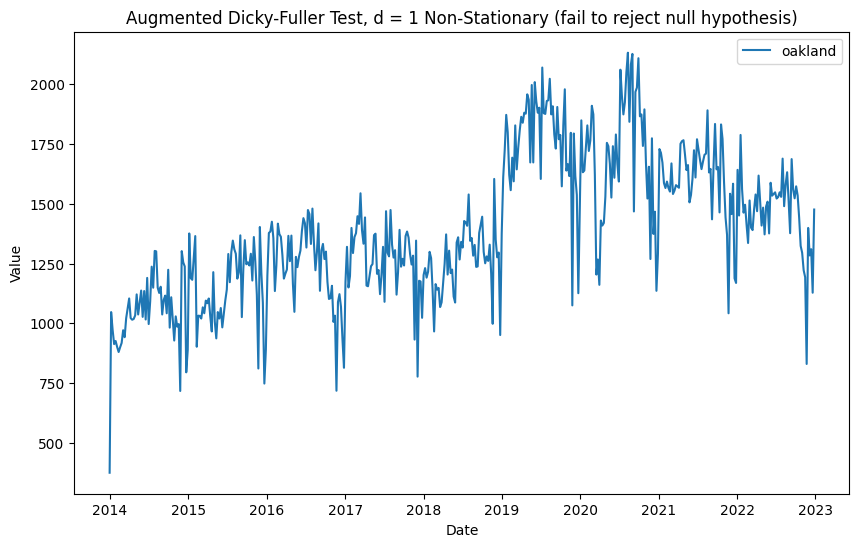

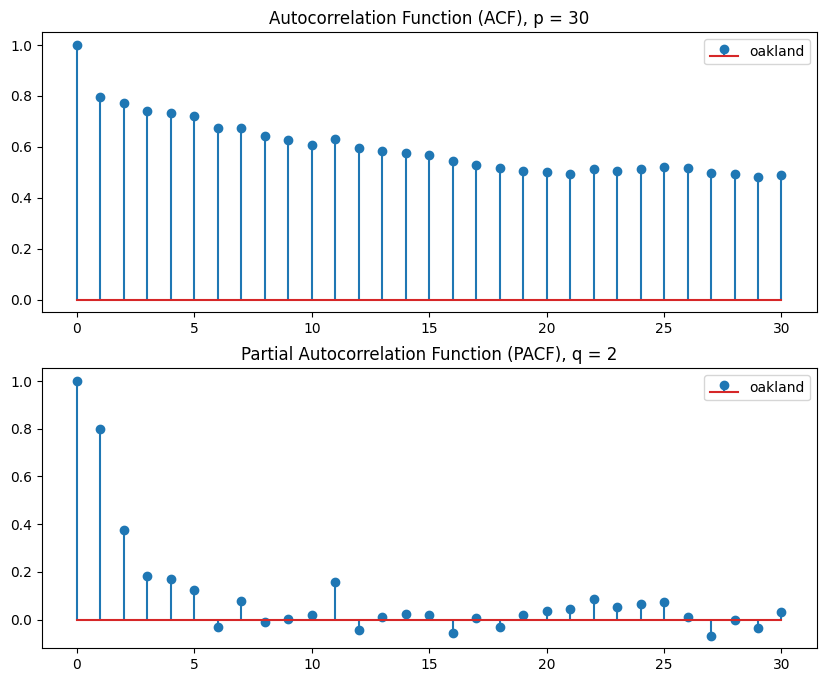

{'d': 1, 'p': 30, 'q': 2}
Processing file: ../data/out/oakland_ILLDUMP_train.csv
ADF Statistic: -2.7176114411100514
p-value: 0.07103998665772092
Differencing d=1, ADF Statistic: -6.642074801223283
Differencing d=1, p-value: 5.37852818243558e-09
Determined d=1 for differencing.


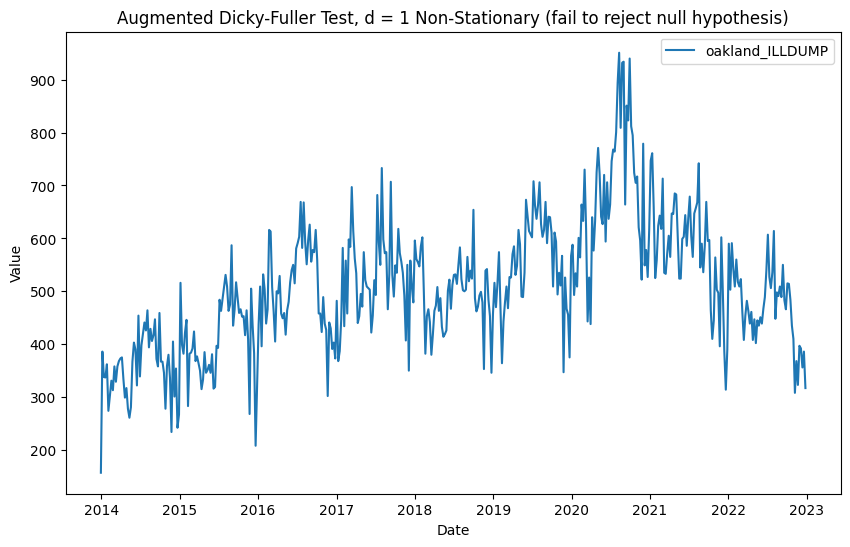

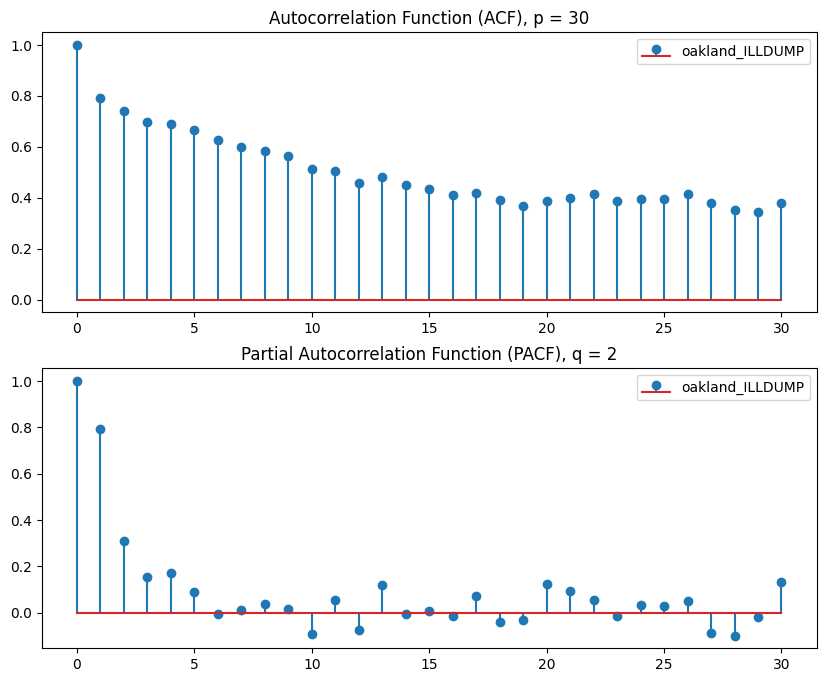

{'d': 1, 'p': 30, 'q': 2}


In [49]:
import os
import pandas as pd
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, acf, pacf

def identify_parameters(file_path):
    """
    Function to identify parameters for a time series model.

    Parameters:
    - file_path: Path to the CSV file containing the time series data.

    Returns:
    - Dictionary containing identified parameters: 'd', 'p', 'q'.
    """
        
    # Grab the basename of the file for the figure titles
    file_name = os.path.basename(file_path)[:-10]

    # Load Data
    train_data = pd.read_csv(file_path, dtype={'count': float})
    train_data['week_start'] = pd.to_datetime(train_data['week_start']) # Convert 'week_start' column to datetime

    # Augmented Dickey-Fuller Test (Stationary Test)
    result = adfuller(train_data['count'])
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    if result[1] <= 0.05:
        msg = 'Stationary (reject null hypothesis)'
        d = 0  # Set d to 0 for stationary data
    else:
        msg = 'Non-Stationary (fail to reject null hypothesis)'
        # Determine order of differencing (d)
        d = 1
        while True:
            differenced_data = train_data['count'].diff(periods=d).dropna()
            result_diff = adfuller(differenced_data)
            print(f'Differencing d={d}, ADF Statistic:', result_diff[0])
            print(f'Differencing d={d}, p-value:', result_diff[1])
            if result_diff[1] <= 0.05 or d >= 3:  # Stop increasing differencing if p-value is <= 0.05 or reached maximum differencing
                print(f'Determined d={d} for differencing.')
                break
            d += 1

    # Visual inspection and stationarity check
    plt.figure(figsize=(10, 6))
    plt.plot(train_data['week_start'], train_data['count'], label=file_name)
    plt.title(f'Augmented Dicky-Fuller Test, d = {d} {msg}')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

    # Autocorrelation and Partial Autocorrelation Analysis
    acf_vals, confint = acf(train_data['count'], nlags=30, alpha=0.05)
    pacf_vals, confint = pacf(train_data['count'], nlags=30, alpha=0.05)

    # Identify p and q based on significant lags in ACF and PACF plots
    significant_acf_lags = np.where(acf_vals > 0.2)[0]
    significant_pacf_lags = np.where(pacf_vals > 0.2)[0]

    # Set p and q based on significant lags
    p = max(significant_acf_lags) if significant_acf_lags.size > 0 else 0
    q = max(significant_pacf_lags) if significant_pacf_lags.size > 0 else 0

    # Plot ACF and PACF
    fig, ax = plt.subplots(2, 1, figsize=(10, 8))
    ax[0].stem(acf_vals, label=file_name)
    ax[0].set_title(f'Autocorrelation Function (ACF), p = {p}')
    ax[0].legend()
    ax[1].stem(pacf_vals, label=file_name)
    ax[1].set_title(f'Partial Autocorrelation Function (PACF), q = {q}')
    ax[1].legend()
    plt.show()

    parameters = {'d': d, 'p': p, 'q': q}
    return parameters

# Get a list of all files with 'train' in their name in the directory
train_files = glob(os.path.join('../data/out/', '*train*.csv'))

# Loop through each train file
for file_path in train_files:
    print(f'Processing file: {file_path}')
    
    # Identify parameters
    parameters = identify_parameters(file_path)
    print(parameters)


### Seasonality Determination

Ultimately, the decision to include seasonal parameters in the model should be based on a combination of visual inspection of the seasonal patterns, statistical tests for seasonality, domain knowledge, and the specific objectives of the analysis. If the seasonal component appears to contribute significantly to the overall variability in the data and captures meaningful patterns, it may be appropriate to incorporate seasonal parameters into the model.








Processing file: ../data/out/boston_Public Works Department_train.csv


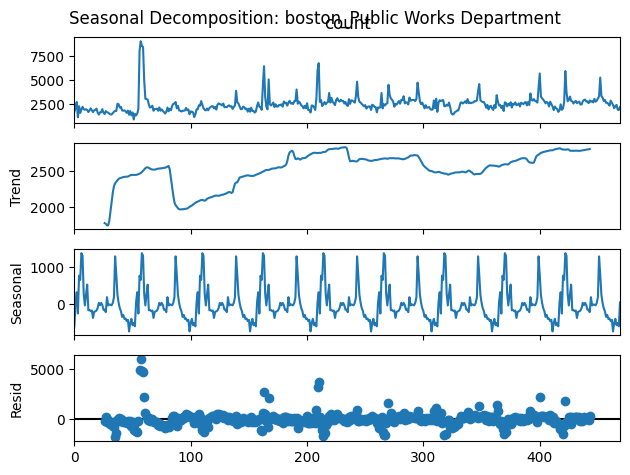

Processing file: ../data/out/buffalo_DPIS_train.csv


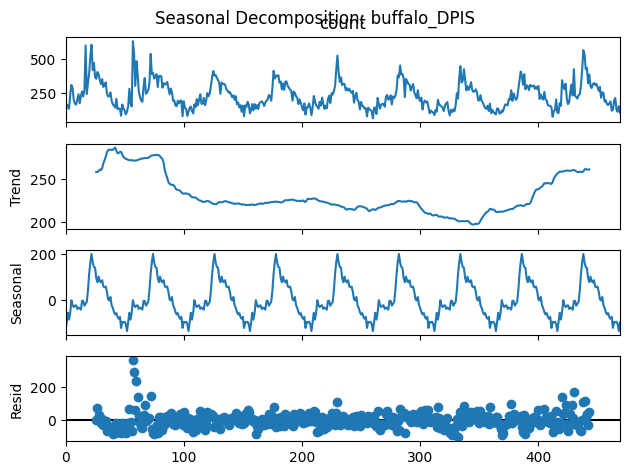

Processing file: ../data/out/boston_Transportation - Traffic Division_train.csv


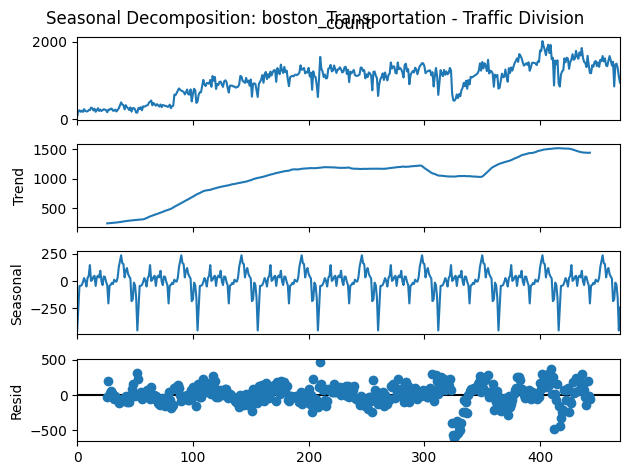

Processing file: ../data/out/oakland_PARKING_train.csv


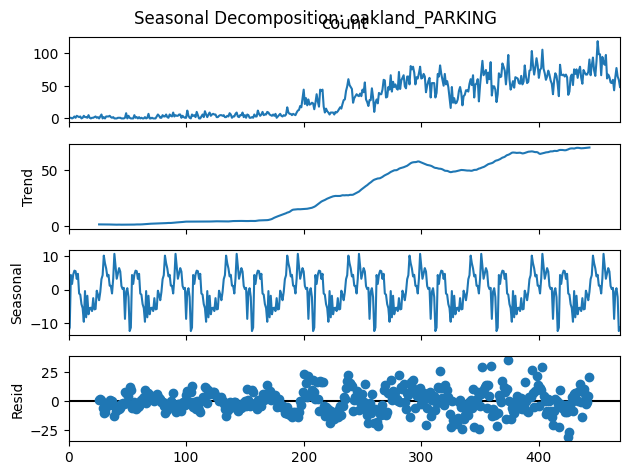

Processing file: ../data/out/boston_train.csv


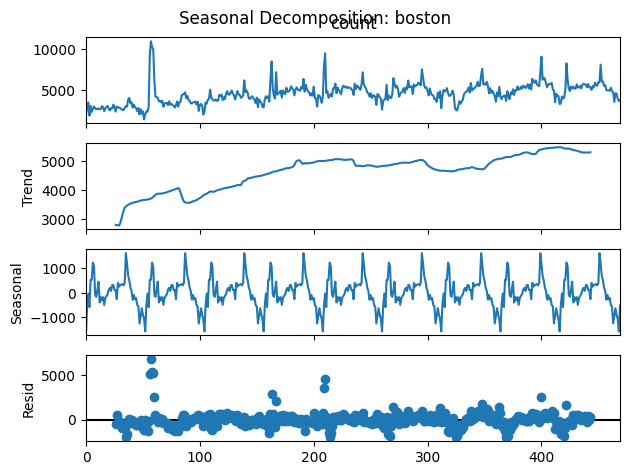

Processing file: ../data/out/washington_UFA_train.csv


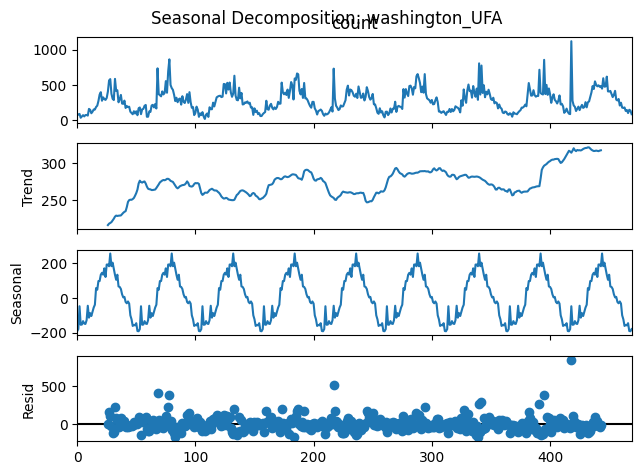

Processing file: ../data/out/oakland_STREETSW_train.csv


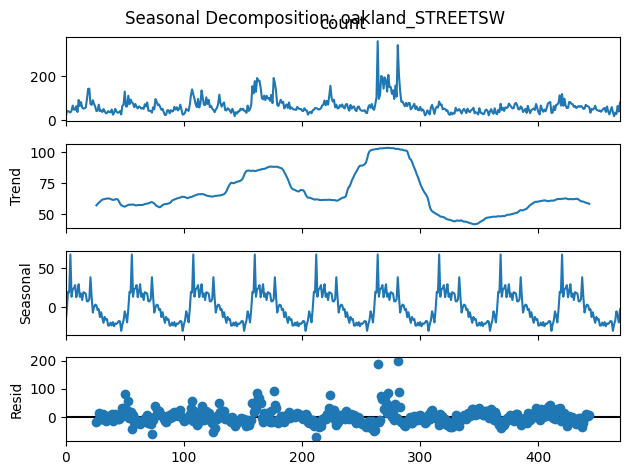

Processing file: ../data/out/washington_TOA-CW_train.csv


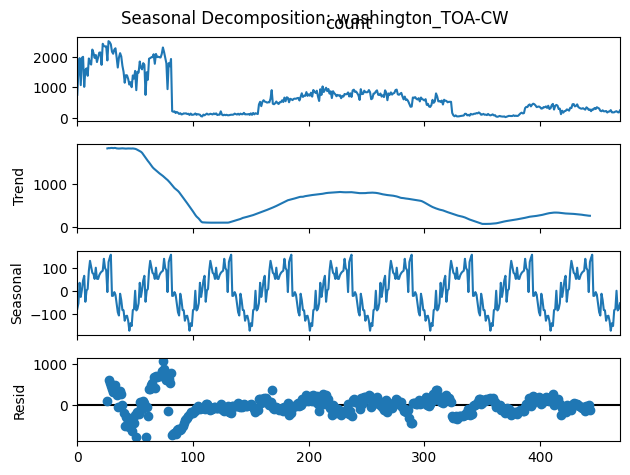

Processing file: ../data/out/buffalo_Buffalo Police Department_train.csv


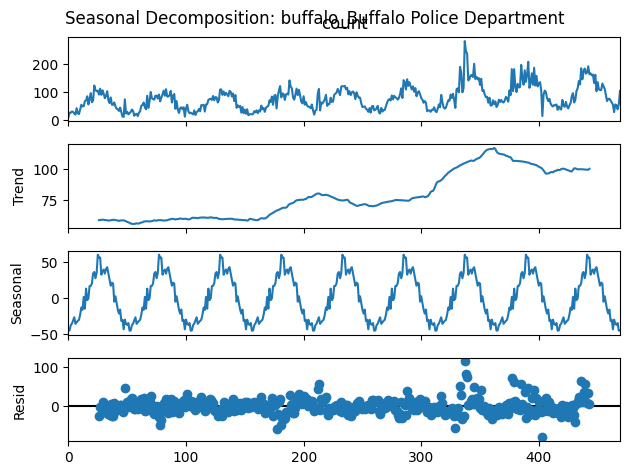

Processing file: ../data/out/washington_train.csv


KeyboardInterrupt: 

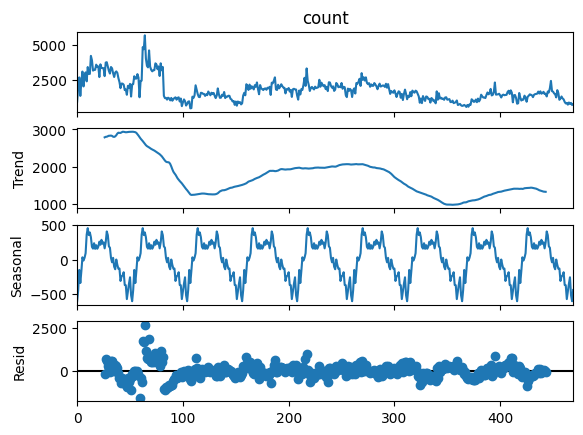

In [52]:
import os
import pandas as pd
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

def seasonal_decomp(file_path):
    """
    Function to identify parameters for a time series model.

    Parameters:
    - file_path: Path to the CSV file containing the time series data.

    Returns:
    - Dictionary containing identified parameters: 'd', 'p', 'q'.
    """
        
    # Grab the basename of the file for the figure titles
    file_name = os.path.basename(file_path)[:-10]

    # Load Data
    train_data = pd.read_csv(file_path, dtype={'count': float})
    train_data['week_start'] = pd.to_datetime(train_data['week_start']) # Convert 'week_start' column to datetime

    # Decomposition Plot
    decomposition = seasonal_decompose(train_data['count'], model='additive', period=52)  # Assuming weekly seasonality
    decomposition.plot()
    plt.suptitle(f'Seasonal Decomposition: {file_name}')
    plt.show()

# Get a list of all files with 'train' in their name in the directory
train_files = glob(os.path.join('../data/out/', '*train*.csv'))

# Loop through each train file
for file_path in train_files:
    print(f'Processing file: {file_path}')
    
    # Identify parameters
    parameters = seasonal_decomp(file_path)


### Grid Search

In [53]:
import pandas as pd
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

def grid_search_sarima(train_data, valid_data, p_values, d_values, q_values, P_values, D_values, Q_values, m):
    """
    Perform grid search to find the best SARIMA model parameters.

    Parameters:
    - train_data: DataFrame containing the training time series data.
    - valid_data: DataFrame containing the validation time series data.
    - p_values, d_values, q_values: Lists of values to search for the non-seasonal SARIMA parameters.
    - P_values, D_values, Q_values: Lists of values to search for the seasonal SARIMA parameters.
    - m: Seasonal period.

    Returns:
    - Dictionary containing the best SARIMA model parameters and corresponding evaluation metrics.
    """

    evaluation_metrics = []

    for p in p_values:
        for d in d_values:
            for q in q_values:
                for P in P_values:
                    for D in D_values:
                        for Q in Q_values:
                            try:
                                # Train SARIMA model
                                model = auto_arima(train_data, start_p=p, d=d, start_q=q,
                                                   max_p=3, max_d=3, max_q=3, m=m,
                                                   start_P=P, D=D, start_Q=Q,
                                                   max_P=3, max_D=3, max_Q=3,
                                                   seasonal=True, trace=True,
                                                   error_action='ignore',  # don't want to know if an order does not work
                                                   suppress_warnings=True,  # don't want convergence warnings
                                                   stepwise=True)  # set to stepwise

                                # Generate forecast
                                forecast = model.predict(n_periods=len(valid_data))

                                # Compute evaluation metrics
                                mse = mean_squared_error(valid_data, forecast)
                                mae = mean_absolute_error(valid_data, forecast)
                                rmse = np.sqrt(mse)
                                r2 = r2_score(valid_data, forecast)

                                # Store evaluation metrics along with model parameters
                                evaluation_metrics.append({
                                    'p': p, 'd': d, 'q': q,
                                    'P': P, 'D': D, 'Q': Q,
                                    'MSE': mse, 'MAE': mae, 'RMSE': rmse,
                                    'R2': r2
                                })

                                print("Model (p={}, d={}, q={}, P={}, D={}, Q={}):".format(p, d, q, P, D, Q))
                                print("Mean Squared Error (MSE):", mse)
                                print("Mean Absolute Error (MAE):", mae)
                                print("Root Mean Squared Error (RMSE):", rmse)
                                print("R-squared (R2):", r2)
                                print()

                            except Exception as e:
                                print("Error occurred for model (p={}, d={}, q={}, P={}, D={}, Q={}):".format(p, d, q, P, D, Q))
                                print(e)
                                print()

    # Find the best R2 score
    best_r2 = max(evaluation_metrics, key=lambda x: x['R2'])
    print("Best R-squared (R2) score:", best_r2)

    return best_r2

# Load train and validation data
train = pd.read_csv('../data/out/buffalo_train.csv', dtype={'count': float})
valid = pd.read_csv('../data/out/buffalo_test.csv', dtype={'count': float})

# Define parameter grid
p_values = range(0, 3)
d_values = range(0, 2)
q_values = range(0, 3)
P_values = range(0, 3)
D_values = range(0, 2)
Q_values = range(0, 3)
m = 12  # Seasonal period

# Perform grid search
best_params = grid_search_sarima(train['count'], valid['count'], p_values, d_values, q_values, P_values, D_values, Q_values, m)



Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=7126.648, Time=0.09 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=6871.960, Time=0.41 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=6976.621, Time=0.38 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=8255.432, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=6870.258, Time=0.04 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=6871.976, Time=0.16 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=6873.953, Time=0.85 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : AIC=6848.475, Time=0.09 sec
 ARIMA(2,0,0)(1,0,0)[12] intercept   : AIC=6850.150, Time=0.65 sec
 ARIMA(2,0,0)(0,0,1)[12] intercept   : AIC=6850.141, Time=0.55 sec
 ARIMA(2,0,0)(1,0,1)[12] intercept   : AIC=6852.141, Time=0.83 sec
 ARIMA(3,0,0)(0,0,0)[12] intercept   : AIC=6844.198, Time=0.13 sec
 ARIMA(3,0,0)(1,0,0)[12] intercept   : AIC=6845.658, Time=0.79 sec
 ARIMA(3,0,0)(0,0,1)[12] intercept   : AIC=6845.636, Time=0.67 sec
 ARIMA(3,0,0)(1,0,1

KeyboardInterrupt: 

Non-seasonal ARIMA parameters:

p: 1
d: 1
q: 1
Seasonal ARIMA parameters:

P: 0
D: 0
Q: 0

These parameters define the SARIMA model that yielded the lowest MSE (Mean Squared Error) among the models evaluated. Here's what each parameter means:

p, d, q: Non-seasonal ARIMA parameters specifying the autoregressive order, differencing order, and moving average order, respectively.

P, D, Q: Seasonal ARIMA parameters specifying the seasonal autoregressive order, seasonal differencing order, and seasonal moving average order, respectively.

MSE: Mean Squared Error, which measures the average of the squares of the errors between predicted and actual values. In this case, it's approximately 1830343.178.

MAE: Mean Absolute Error, which measures the average of the absolute errors between predicted and actual values. In this case, it's approximately 1300.873.

RMSE: Root Mean Squared Error, which is the square root of the MSE and measures the average magnitude of the errors in the predicted values. In this case, it's approximately 1352.902.

These parameters and evaluation metrics provide insights into the SARIMA model's performance and can be used for further analysis and comparison with other models.







In [6]:
# Best Model Parameters: {'p': 1, 'd': 1, 'q': 1, 'P': 1, 'D': 1, 'Q': 1, 'MSE': 6811786.009614338, 'MAE': 2416.1465494569643, 'RMSE': 2609.939847891966}
# Best Model Parameters: {'p': 1, 'd': 1, 'q': 1, 'P': 0, 'D': 0, 'Q': 0, 'MSE': 1830343.1783731617, 'MAE': 1300.8733546952224, 'RMSE': 1352.9017622773508}